1.The problem statement involves building a machine learning model to predict rainfall in Sydney using classification techniques. It requires data preprocessing, modeling with decision trees and ensemble methods like bagging and boosting, and evaluating model performance. The relevance lies in accurate weather prediction's importance, with potential improvements through feature engineering and hyperparameter tuning

2. -Data Preprocessing: Begin with data cleaning and preprocessing steps, including handling missing values, encoding categorical features, and scaling numerical data to prepare it for modeling.

-Model Implementation: Implement decision tree classification as a baseline model to understand the initial predictive performance for rainfall.

-Ensemble Methods: Explore ensemble techniques such as Bagging (Random Forest) and Boosting (Gradient Boosting) to leverage the collective wisdom of multiple models for improved accuracy.

-Evaluation and Comparison: Evaluate the performance of each model using appropriate evaluation metrics like accuracy, precision, recall, and F1-score. Compare the results to identify the most effective approach.

-Hyperparameter Tuning and Selection: Fine-tune the hyperparameters of the models using techniques like grid search or randomized search to optimize performance. Select the best-performing model based on evaluation metrics for rainfall prediction.

3.-Decision Trees
-Random Forest
-Gradient Boosting
-AdaBoost
-XGBoost

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Arya Sengupta\Downloads\sydney_rain-prediction.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2/2/2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2/3/2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2/4/2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2/5/2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


Filling the null values

In [5]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64']).columns

# Fill null values with mean for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [6]:
df = pd.get_dummies(df, columns = ["RainToday", "RainTomorrow"], drop_first = True)

In [7]:
df["RainToday_Yes"] = df["RainToday_Yes"].astype(int)
df["RainTomorrow_Yes"] = df["RainTomorrow_Yes"].astype(int)

In [8]:
# Calculate mode of "RainToday" column
mode_rain_today = df["RainToday_Yes"].mode()[0]

# Fill null values in "RainToday" with mode
df["RainToday_Yes"].fillna(mode_rain_today, inplace=True)

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


Finding outliers

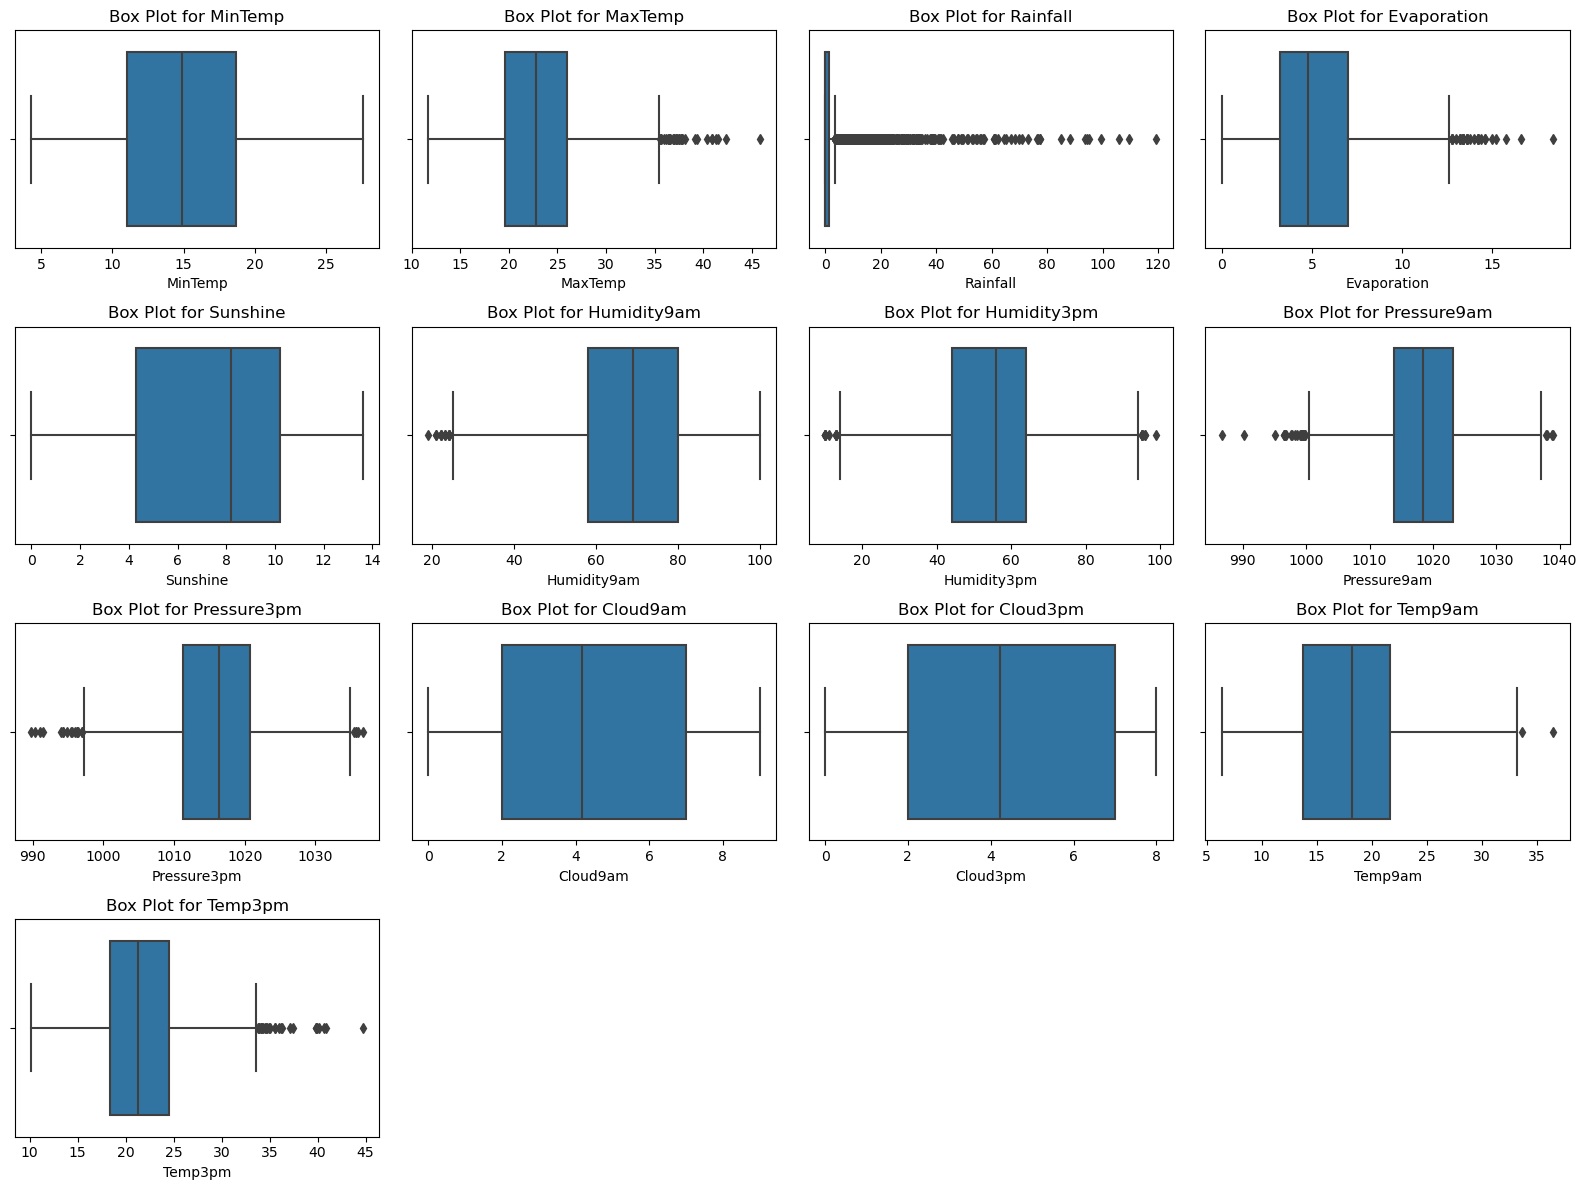

In [10]:
# Select numeric columns for box plots
numeric_columns = df.select_dtypes(include=['float64']).columns

# Create box plots for each numeric column
plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


In [11]:
upper_limit = np.percentile(df.MaxTemp, [99])[0]
df[(df.MaxTemp > 3*upper_limit)]
df.MaxTemp[(df.MaxTemp > 3*upper_limit)] = 3*upper_limit

C:\Users\Arya Sengupta\AppData\Local\Temp\ipykernel_12920\2382003784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MaxTemp[(df.MaxTemp > 3*upper_limit)] = 3*upper_limit


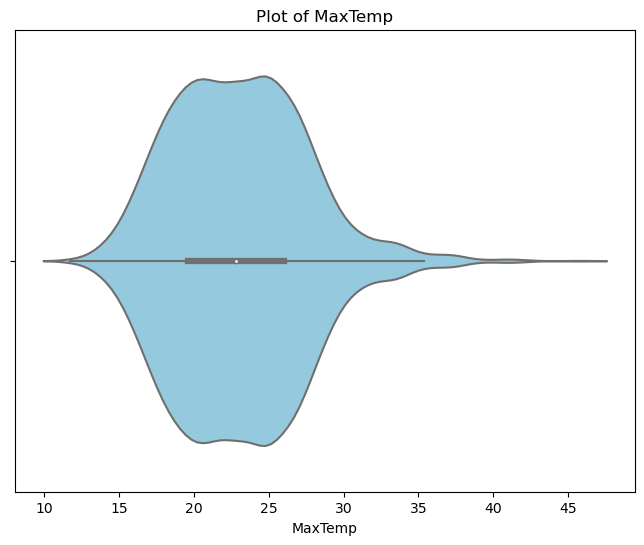

In [12]:
# Create a violin plot for MaxTemp
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['MaxTemp'], color='skyblue')
plt.title('Plot of MaxTemp')
plt.xlabel('MaxTemp')
plt.show()


C:\Users\Arya Sengupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Arya Sengupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Arya Sengupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Arya Sengupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

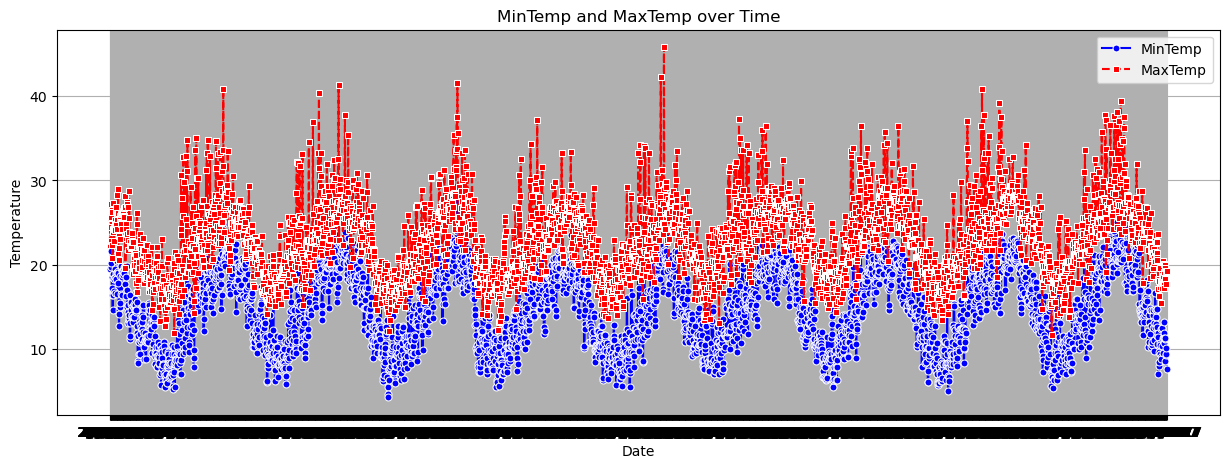

In [13]:
colors = ['blue', 'red']

plt.figure(figsize=(15, 5))
# Plot MinTemp
sns.lineplot(data=df, x='Date', y='MinTemp', label='MinTemp', color=colors[0], linestyle='-', marker='o', markersize=5)
# Plot MaxTemp
sns.lineplot(data=df, x='Date', y='MaxTemp', label='MaxTemp', color=colors[1], linestyle='--', marker='s', markersize=5)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('MinTemp and MaxTemp over Time')
plt.legend()
plt.grid(True)
plt.show()


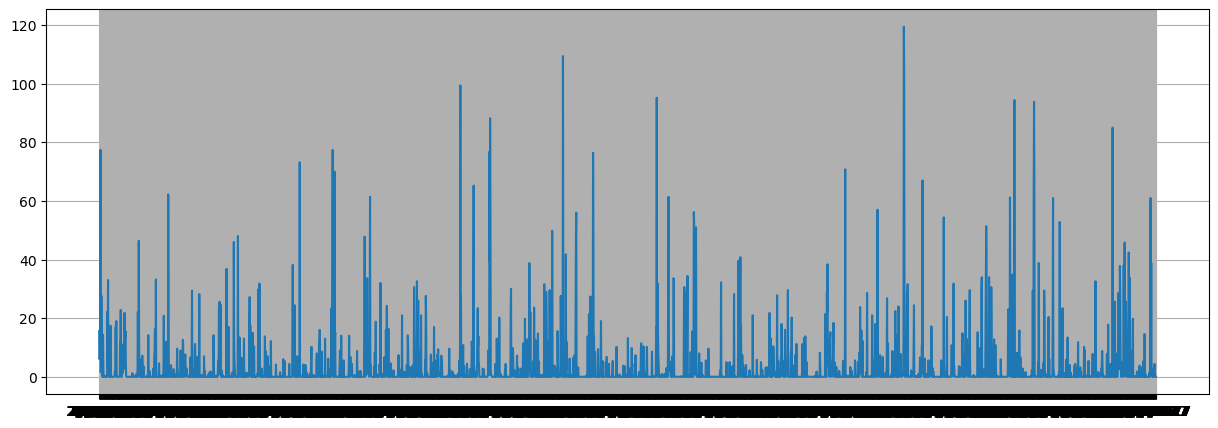

In [14]:
plt.figure(figsize = (15,5))
fig = plt.plot(df['Date'], df[['Rainfall']])
plt.grid();

Test Train Split

In [15]:
from sklearn.model_selection import train_test_split

x_multi = df.drop(['RainTomorrow_Yes','Date', 'Location'], axis=1)
y_multi = df['RainTomorrow_Yes']

x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=42)

Descision Tree Classifier

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Define the classifier
clftree = DecisionTreeClassifier(max_depth=3)

# Fit the classifier
clftree.fit(x_train, y_train)

# Predict values
y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

# Print evaluation metrics for training data
print("Training Data:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Precision Score:", precision_score(y_train, y_train_pred))
print("Recall Score:", recall_score(y_train, y_train_pred))
print("ROC AUC Score:", roc_auc_score(y_train, y_train_pred))

# Print evaluation metrics for testing data
print("\nTesting Data:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Precision Score:", precision_score(y_test, y_test_pred))
print("Recall Score:", recall_score(y_test, y_test_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_test_pred))

Training Data:
Confusion Matrix:
[[1815  173]
 [ 288  393]]
Accuracy Score: 0.8272761333832896
Precision Score: 0.6943462897526502
Recall Score: 0.5770925110132159
ROC AUC Score: 0.7450351891082176

Testing Data:
Confusion Matrix:
[[430  54]
 [ 78 106]]
Accuracy Score: 0.8023952095808383
Precision Score: 0.6625
Recall Score: 0.5760869565217391
ROC AUC Score: 0.7322583542939275


BaggingClassifier

In [18]:
from sklearn.ensemble import BaggingClassifier

base_tree = tree.DecisionTreeClassifier(max_depth=3)
# Create a BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=base_tree, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {'n_estimators': [10, 50, 100]}

# Perform GridSearchCV
grid_search = GridSearchCV(bagging_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_bagging_clf = grid_search.best_estimator_

# Predict values using the best model
y_train_pred = best_bagging_clf.predict(x_train)
y_test_pred = best_bagging_clf.predict(x_test)

# Calculate evaluation metrics
cfm_train = confusion_matrix(y_train, y_train_pred)
cfm_test = confusion_matrix(y_test, y_test_pred)
acs_train = accuracy_score(y_train, y_train_pred)
acs_test = accuracy_score(y_test, y_test_pred)
pcs_train = precision_score(y_train, y_train_pred)
pcs_test = precision_score(y_test, y_test_pred)
rcs_train = recall_score(y_train, y_train_pred)
rcs_test = recall_score(y_test, y_test_pred)
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

# Print the results
print("Best Hyperparameter:", grid_search.best_params_)

# Print evaluation metrics for training data
print("\nTraining Data:")
print("Confusion Matrix:")
print(cfm_train)
print("Accuracy Score:", acs_train)
print("Precision Score:", pcs_train)
print("Recall Score:", rcs_train)
print("ROC AUC Score:", roc_auc_score_train)

# Print evaluation metrics for testing data
print("\nTesting Data:")
print("Confusion Matrix:")
print(cfm_test)
print("Accuracy Score:", acs_test)
print("Precision Score:", pcs_test)
print("Recall Score:", rcs_test)
print("ROC AUC Score:", roc_auc_score_test)


C:\Users\Arya Sengupta\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Arya Sengupta\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Arya Sengupta\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Arya Sengupta\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Arya Sengupta\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.w

Best Hyperparameter: {'n_estimators': 10}

Training Data:
Confusion Matrix:
[[1923   65]
 [ 357  324]]
Accuracy Score: 0.8418883476957663
Precision Score: 0.8329048843187661
Recall Score: 0.47577092511013214
ROC AUC Score: 0.7215373740238789

Testing Data:
Confusion Matrix:
[[462  22]
 [ 97  87]]
Accuracy Score: 0.8218562874251497
Precision Score: 0.7981651376146789
Recall Score: 0.47282608695652173
ROC AUC Score: 0.7136857707509882


C:\Users\Arya Sengupta\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 4],
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

# Get the best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf_classifier = grid_search_rf.best_estimator_

# Predict values using the best model
y_train_pred_rf = best_rf_classifier.predict(x_train)
y_test_pred_rf = best_rf_classifier.predict(x_test)

# Model Performance
cfm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
cfm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
acs_train_rf = accuracy_score(y_train, y_train_pred_rf)
acs_test_rf = accuracy_score(y_test, y_test_pred_rf)
pcs_train_rf = precision_score(y_train, y_train_pred_rf)
pcs_test_rf = precision_score(y_test, y_test_pred_rf)
rcs_train_rf = recall_score(y_train, y_train_pred_rf)
rcs_test_rf = recall_score(y_test, y_test_pred_rf)
roc_auc_score_train_rf = roc_auc_score(y_train, y_train_pred_rf)
roc_auc_score_test_rf = roc_auc_score(y_test, y_test_pred_rf)

# Print evaluation metrics for training data
print("Random Forest Classifier Results:")
print("\nTraining Data:")
print("Confusion Matrix:")
print(cfm_train_rf)
print("Accuracy Score:", acs_train_rf)
print("Precision Score:", pcs_train_rf)
print("Recall Score:", rcs_train_rf)
print("ROC AUC Score:", roc_auc_score_train_rf)

# Print evaluation metrics for testing data
print("\nTesting Data:")
print("Confusion Matrix:")
print(cfm_test_rf)
print("Accuracy Score:", acs_test_rf)
print("Precision Score:", pcs_test_rf)
print("Recall Score:", rcs_test_rf)
print("ROC AUC Score:", roc_auc_score_test_rf)


Random Forest Classifier Results:

Training Data:
Confusion Matrix:
[[1955   33]
 [ 197  484]]
Accuracy Score: 0.913825402772574
Precision Score: 0.9361702127659575
Recall Score: 0.71071953010279
ROC AUC Score: 0.8470599662586384

Testing Data:
Confusion Matrix:
[[452  32]
 [ 85  99]]
Accuracy Score: 0.8248502994011976
Precision Score: 0.7557251908396947
Recall Score: 0.5380434782608695
ROC AUC Score: 0.7359638878907654


GradientBoostingClassifier

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
}

# Perform GridSearchCV with smaller cross-validation folds (cv=2)
grid_search_gb = GridSearchCV(gb_classifier, param_grid_gb, cv=2, scoring='accuracy')
grid_search_gb.fit(x_train, y_train)

# Get the best parameters and model
best_gb_classifier = grid_search_gb.best_estimator_

# Predict values using the best model
y_train_pred_gb = best_gb_classifier.predict(x_train)
y_test_pred_gb = best_gb_classifier.predict(x_test)

# Model Performance
cfm_train_gb = confusion_matrix(y_train, y_train_pred_gb)
cfm_test_gb = confusion_matrix(y_test, y_test_pred_gb)
acs_train_gb = accuracy_score(y_train, y_train_pred_gb)
acs_test_gb = accuracy_score(y_test, y_test_pred_gb)
pcs_train_gb = precision_score(y_train, y_train_pred_gb)
pcs_test_gb = precision_score(y_test, y_test_pred_gb)
rcs_train_gb = recall_score(y_train, y_train_pred_gb)
rcs_test_gb = recall_score(y_test, y_test_pred_gb)
roc_auc_score_train_gb = roc_auc_score(y_train, y_train_pred_gb)
roc_auc_score_test_gb = roc_auc_score(y_test, y_test_pred_gb)

# Print the results for Gradient Boosting Classifier
print("Gradient Boosting Classifier Results:")
print("\nTraining Data:")
print("Confusion Matrix:")
print(cfm_train_gb)
print("Accuracy Score:", acs_train_gb)
print("Precision Score:", pcs_train_gb)
print("Recall Score:", rcs_train_gb)
print("ROC AUC Score:", roc_auc_score_train_gb)

# Print evaluation metrics for testing data
print("\nTesting Data:")
print("Confusion Matrix:")
print(cfm_test_gb)
print("Accuracy Score:", acs_test_gb)
print("Precision Score:", pcs_test_gb)
print("Recall Score:", rcs_test_gb)
print("ROC AUC Score:", roc_auc_score_test_gb)


Gradient Boosting Classifier Results:

Training Data:
Confusion Matrix:
[[1923   65]
 [ 260  421]]
Accuracy Score: 0.8782315473960285
Precision Score: 0.8662551440329218
Recall Score: 0.618208516886931
ROC AUC Score: 0.7927561699122785

Testing Data:
Confusion Matrix:
[[447  37]
 [ 83 101]]
Accuracy Score: 0.8203592814371258
Precision Score: 0.7318840579710145
Recall Score: 0.5489130434782609
ROC AUC Score: 0.7362333812432625


AdaBoostClassifier

In [23]:
from sklearn.ensemble import AdaBoostClassifier

# Create a base classifier (e.g., Decision Tree)
base_classifier = tree.DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid_adaboost = {
    'n_estimators': [50, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Perform GridSearchCV
grid_search_adaboost = GridSearchCV(adaboost_classifier, param_grid_adaboost, cv=3, scoring='accuracy')
grid_search_adaboost.fit(x_train, y_train)

# Get the best parameters and model
best_params_adaboost = grid_search_adaboost.best_params_
best_adaboost_classifier = grid_search_adaboost.best_estimator_

# Predict values using the best model
y_train_pred_adaboost = best_adaboost_classifier.predict(x_train)
y_test_pred_adaboost = best_adaboost_classifier.predict(x_test)

# Model Performance
cfm_train_adaboost = confusion_matrix(y_train, y_train_pred_adaboost)
cfm_test_adaboost = confusion_matrix(y_test, y_test_pred_adaboost)
acs_train_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
acs_test_adaboost = accuracy_score(y_test, y_test_pred_adaboost)
pcs_train_adaboost = precision_score(y_train, y_train_pred_adaboost)
pcs_test_adaboost = precision_score(y_test, y_test_pred_adaboost)
rcs_train_adaboost = recall_score(y_train, y_train_pred_adaboost)
rcs_test_adaboost = recall_score(y_test, y_test_pred_adaboost)
roc_auc_score_train_adaboost = roc_auc_score(y_train, y_train_pred_adaboost)
roc_auc_score_test_adaboost = roc_auc_score(y_test, y_test_pred_adaboost)

# Print the results for AdaBoost Classifier
print("AdaBoost Classifier Results:")
print("\nTraining Data:")
print("Confusion Matrix:")
print(cfm_train_adaboost)
print("Accuracy Score:", acs_train_adaboost)
print("Precision Score:", pcs_train_adaboost)
print("Recall Score:", rcs_train_adaboost)
print("ROC AUC Score:", roc_auc_score_train_adaboost)

# Print evaluation metrics for testing data
print("\nTesting Data:")
print("Confusion Matrix:")
print(cfm_test_adaboost)
print("Accuracy Score:", acs_test_adaboost)
print("Precision Score:", pcs_test_adaboost)
print("Recall Score:", rcs_test_adaboost)
print("ROC AUC Score:", roc_auc_score_test_adaboost)


AdaBoost Classifier Results:

Training Data:
Confusion Matrix:
[[1908   80]
 [ 335  346]]
Accuracy Score: 0.8445110528287748
Precision Score: 0.812206572769953
Recall Score: 0.5080763582966226
ROC AUC Score: 0.7339174548022347

Testing Data:
Confusion Matrix:
[[458  26]
 [ 91  93]]
Accuracy Score: 0.8248502994011976
Precision Score: 0.7815126050420168
Recall Score: 0.5054347826086957
ROC AUC Score: 0.7258578871721164


4.Descision Tree Classifier-
Accuracy Score: 0.8023952095808383
Precision Score: 0.6625
Recall Score: 0.5760869565217391
ROC AUC Score: 0.7322583542939
BaggingClassifier-
Accuracy Score: 0.8218562874251497
Precision Score: 0.7981651376146789
Recall Score: 0.47282608695652173
ROC AUC Score: 0.7136857707509
Random Forest Classifier-
Accuracy Score: 0.8248502994011976
Precision Score: 0.7557251908396947
Recall Score: 0.5380434782608695
ROC AUC Score: 0.7359638878907
GradientBoostingClassifier-
Accuracy Score: 0.8203592814371258
Precision Score: 0.7318840579710145
Recall Score: 0.5489130434782609
ROC AUC Score: 0.73623338124326AdaBoostClassifier-
Accuracy Score: 0.8248502994011976
Precision Score: 0.7815126050420168
Recall Score: 0.5054347826086957
ROC AUC Score: 0.72585788717211The Random Forest Classifier is the best model for predicting rainfall as it demonstrates the highest accuracy, precision, recall, and ROC AUC score compared to other classifiers. Its balanced performance makes it the optimal choice for accurate rainfall prediction.6425

654882
275

5.To improve the performance further:

Implement XG Boost Classifier

Feature Engineering: Exploring additional relevant features or transforming existing ones to better capture the nuances of rainfall patterns.

Hyperparameter Optimization: Conducting extensive tuning of hyperparameters using techniques like grid search or random search to fine-tune model performance.

Ensemble Methods: Experimenting with different ensemble methods or stacking techniques to leverage the strengths of multiple models and enhance predictive accuracy.